#Is Stroop effect statistically significant?

The purpose of this project is to check if [Stroop effect](https://en.wikipedia.org/wiki/Stroop_effect) is statistically significant based on a given data set.  
Participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. 

####Data set
[Link to the data set used](https://www.google.com/url?q=https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view?usp%3Dsharing&sa=D&usg=AFQjCNGAjbK9VYD5GsQ8c_iRT9zH9QdOVg)  
Each of twenty-four participants performed the task in both congruent and inconguent conditions and the reaction time was measured.  
Congruent means that the words being displayed are color words whose names match the colors in which they are printed: <font color='red'>RED</font>, <font color='blue'>BLUE</font>  
Incongruent means that  the words displayed are color words whose names do not match the colors in which they are printed: <font color='green'>PURPLE</font>, <font color='purple'>ORANGE</font>

###1. Variables

*Independent variable :*
 - Condition of task, Congruent or Incongruent  
 
*Dependent variable :*
 - Reaction Time of task

###2. Hypothesis
Let's denote mean of reaction time of congruent condition as $Mc$ and incongruent condition as $Mi$.  
Null hypothesis $H0$ and alternative hypothesis $H1$ are as follows.  
Since the expectation to Stroop effect is that Incongruent condition takes longer time, a directional alternative hypothesis is selected.

$H0 : Mc = Mi$  
$H1 : Mc < Mi$

To investigate those hypothes paired t-test will be used. The reason to choose paired t-test is based on the facts and assumptions below.  

*Fact :*
 - The sample size 24 is less than 30 which is the boarder line that makes the distribution nearly equal to normal distribution. If it's more than 30, z-score can be used instead of t-test.
 - Each candidate takes a test twice in two different conditions. As a result, both samples have the same data size.

*Assumption :*
 - Each test result is independent each other. (One test result does not affect other results.)
 - If the similar data is collected more, the distribution would be close to normal distribution. In other words, those samples are taken from populations which are normally distributed.

###3. Descriptive statistics

In [54]:
import pandas as pd
import numpy as np

stroop = pd.read_csv('stroopdata.csv')
# Difference is created by Incongruent - Congruent so that no negative value appears
stroop['difference'] = stroop.Incongruent - stroop.Congruent

print '### Descriptive statistics ###'
print stroop.describe()
print ''
print '### Standard error of the mean ###'
print stroop.std() / np.sqrt(stroop.count())

### Descriptive statistics ###
       Congruent  Incongruent  difference
count  24.000000    24.000000   24.000000
mean   14.051125    22.015917    7.964792
std     3.559358     4.797057    4.864827
min     8.630000    15.687000    1.950000
25%    11.895250    18.716750    3.645500
50%    14.356500    21.017500    7.666500
75%    16.200750    24.051500   10.258500
max    22.328000    35.255000   21.919000

### Standard error of the mean ###
Congruent      0.726551
Incongruent    0.979195
difference     0.993029
dtype: float64


As shown above, the major statistical attributes of this data set are as follows.  
$d$ denotes the difference(Incongruent - Congruent).

**Mean**  
$Mc=14.05$  
$Mi=22.01$  
$Md=7.96$  

**Standard Deviation** (Normalized by N-1 by default.)  
$SDc=3.56$  
$SDi=4.80$  
$SDd=4.86$

**Standard Error of the mean**  
$SEc=0.73$  
$SEi=0.98$  
$SEd=0.99$

###4. Exploratory analysis

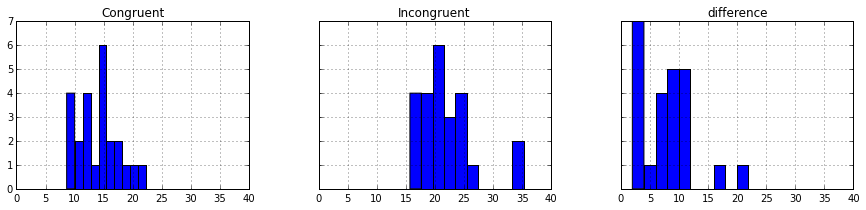

In [55]:
%matplotlib inline 
_ = stroop.hist(sharex=True, sharey=True, figsize=(15, 3), layout=(1, 3))

It's easy to observe that Incongruent condition takes more time since the entire sample distribution shifts to right compared to Congruent condition. The most of differences are within 10+ seconds, but a couple of outliers are observed.

###5. T-test

In [56]:
from scipy import stats

# Paired t-test (manual)
SE = stroop.difference.std() / np.sqrt(stroop.difference.count())
t1 = stroop.difference.mean() / SE

print "T-statistics manually computed is {}".format(t1)

# Paired t-test (scipy)
t2, p2 = stats.ttest_rel(stroop.Incongruent, stroop.Congruent)

print "T-statistics computed by scipy.stats is {}".format(t2)
print "P-value based on the t-statistics is {}".format(p2)

T-statistics manually computed is 8.02070694411
T-statistics computed by scipy.stats is 8.02070694411
P-value based on the t-statistics is 4.10300058571e-08


To start paired t-test, let's set the significance level as 0.01 which is reletively conservative.  
So **the critical value of t-statistics is 2.50** according to [t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg). (Look up a cell where p=0.01 and df=23)  

The null hypothesis $Mc = Mi$ can be described as $Mi - Mc = 0$ which is equivalent to $Md = 0$.  
As computed in the previous section, the mean of *difference* is 7.96 and standard error of the mean of *difference* is 0.99.

$Md=7.96$  
$SEd=0.99$  

Plug in those numbers to the formula : *t-statistics = Mean / Standard Error*  
t-statistics = 7.96 / 0.99 = **8.02**  
The number matches the one in python code above. (Not round-off numbers are used for computation.)  

Since the t-statistics is much bigger than the critical value 2.50, **the null hypothesis is rejected.**  
(According to scipy library, the p-value is actually 4.10-e08 and this is much less than the significance level set at the beginning.)   

As a result, we can say that **the delay of reaction time in Incongruent condition is statistically significant** on a given data set. In other words, Stroop effect is statistically significant.

###6. Impression
The delay of reaction time in Incongruent condition seems to be a certain type of cognitive bias which human being cannot avoid as we learn things. Wikipedia says that this is due to [attentional bias](https://en.wikipedia.org/wiki/Attentional_bias). [Dot-probe paradigm](https://en.wikipedia.org/wiki/Dot-probe_paradigm) and [dichotic listening](https://en.wikipedia.org/wiki/Dichotic_listening) are considered as similar tasks as written in the Wikipedia page.
